## Домашнее задание № 4

### Ансамблевые методы 

**Выполнила:** Бир Анастасия

**Дедлайн: 3.06.2020 23:59** 
Сопровождайте код изображениями и комментариями. Не игнорируйте вопросы, ваши выводы тоже оцениваются. Чем больше информации вы сможете извлечь, аргументированных выводов сформулировать, тем лучше. Не забывайте подписывать графики и будет вам счастье!

**Максимальный балл: 10**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

%matplotlib inline

**0. (0 баллов) ** Загрузите [датасет](https://www.kaggle.com/uciml/pima-indians-diabetes-database/data), в нем вы найдете данные опрошенных женщин из индейского племени Пима. Будем решать задачу бинарной классификации: в колонке Outcome лежит метка наличия или отсутствия диабета - это наша целевая переменная. Есть ли пропущенные значения?

In [3]:
data = pd.read_csv('./diabetes.csv')

**1. (0.5 балла)** Как вы думаете, является ли наличие нулей в некоторых колонках фактом того, что эти признаки имеют пропущенные значения? Замените нули на среднее значение признака там, где считаете это целесообразным.

In [4]:
cols = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI','DiabetesPedigreeFunction','Age']

In [5]:
from sklearn.impute import SimpleImputer

In [6]:
func = SimpleImputer(missing_values=0, copy=False)

In [7]:
data[cols] = func.fit_transform(data[cols])

**2. (1 балл)** Визуализируйте распределение признаков по отдельности для больных диабетом и здоровых.

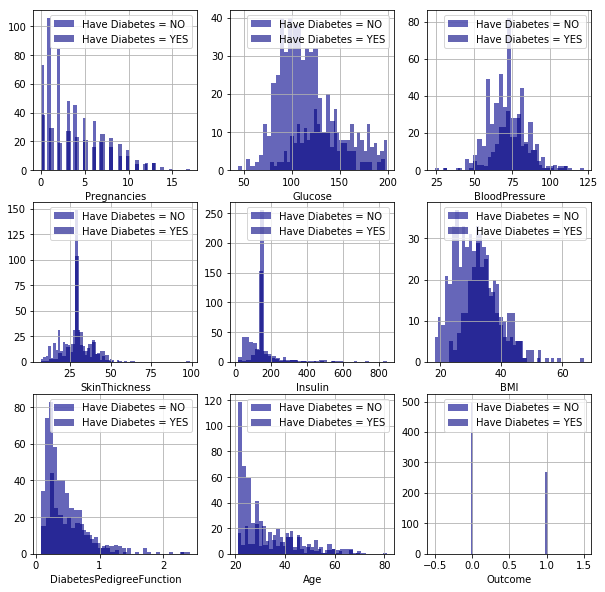

In [8]:
plt.figure(figsize=(10, 10))
for i, column in enumerate(data.columns, 1):
    plt.subplot(3, 3, i)
    data[data["Outcome"] == 0][column].hist(bins=35, 
                                            color='darkblue', 
                                            label='Have Diabetes = NO', 
                                            alpha=0.6)
    data[data["Outcome"] == 1][column].hist(bins=35, 
                                            color='navy', 
                                            label='Have Diabetes = YES', 
                                            alpha=0.6)
    plt.legend()
    plt.xlabel(column)

**3. (2 балла)** Разбейте данные на обучающую и тестовую часть в соотношении 70:30. Обучите *BaggingClassifier* на деревьях (поставьте параметр *base_estimator = DecisionTreeClassifier()*) и *RandomForest*. Возьмите количество базовых алгоритмов, равное 10. Посчитайте accuracy, recall и precision. Есть ли какая-то разница между моделями и их результатами? Как вы думаете, почему получились такие результаты?

*tip: создайте отдельную функцию для вывода метрик качества;*

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score

In [10]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

In [11]:
y = data.pop('Outcome')
X = data

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [21]:
def metrics(model, X_test, y_test):
    print(f'accuracy: {accuracy_score(y_test, model.predict(X_test))}')
    print(f'precision: {precision_score(y_test, model.predict(X_test))}')
    print(f'recall: {recall_score(y_test, model.predict(X_test))}')

#### BaggingClassifier

In [23]:
bagging_clf = BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=10, random_state=42) 

In [24]:
bagging_clf.fit(X_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(), random_state=42)

In [25]:
metrics(bagging_clf, X_test, y_test)

accuracy: 0.7186147186147186
precision: 0.5925925925925926
recall: 0.6


#### RandomForest

In [18]:
from sklearn.ensemble import RandomForestClassifier

In [19]:
random_forest = RandomForestClassifier(random_state=42, n_estimators=10)
random_forest.fit(X_train, y_train)

RandomForestClassifier(n_estimators=10, random_state=42)

In [22]:
metrics(random_forest, X_test, y_test)

accuracy: 0.7445887445887446
precision: 0.6567164179104478
recall: 0.55


**4. (2 балл)** Для случайного леса проанализируйте значение ROC-AUC на этих же данных в зависимости от изменения параметров:
* *n_estimators* (можно перебрать около 10 значений из отрезка от 10 до 1500)
* *min_samples_leaf* (сетку значений можете выбрать на ваше усмотрение)

Постройте соответствующие графики зависимости ROC-AUC от этих параметров. Какие выводы можете сделать?

In [27]:
from sklearn.metrics import roc_auc_score

In [28]:
roc_auc_score(y_test, random_forest.predict(X_test))

0.6988410596026491

In [50]:
n_estimators = np.linspace(10, 1500, 10)

In [111]:
min_samples_leaf = np.linspace(1, 30, 10)

In [117]:
def roc_auc_score_parameters(result, n_estimator, min_samples_leaf):
    random_forest = RandomForestClassifier(random_state=42, n_estimators=int(n_estimator),
                                           min_samples_leaf=int(min_samples_leaf))
    random_forest.fit(X_train, y_train)
    result.append([roc_auc_score(y_test, random_forest.predict(X_test))])
    return result

#### Различные n_estimators

In [119]:
from tqdm import tqdm

In [152]:
df = pd.DataFrame(min_samples_leaf, columns=['min_samples_leaf'])
for i in tqdm(n_estimators):
    result = []
    for j in min_samples_leaf:
        result = roc_auc_score_parameters(result, i, j)
    df = pd.concat([df, pd.DataFrame(result, columns=[f'n_estimators = {int(i)}'])], axis=1)

100%|██████████| 10/10 [01:19<00:00,  7.93s/it]


Text(0.5, 0, 'leaves')

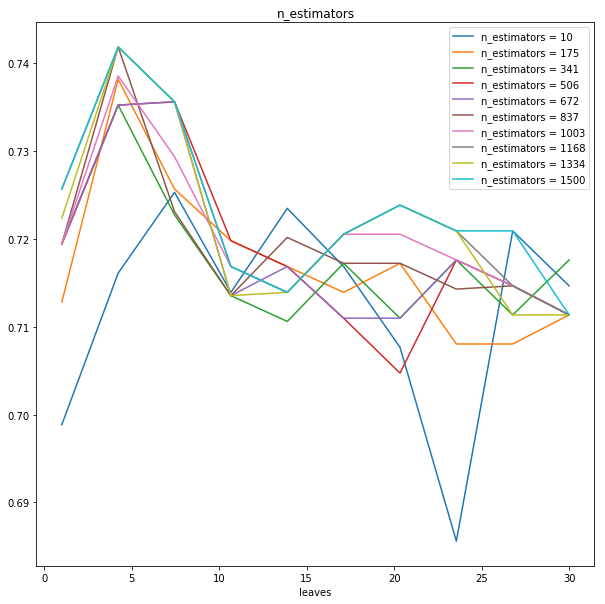

In [153]:
plt.figure(figsize=(10, 10))
plt.plot(df['min_samples_leaf'], df.drop(columns=['min_samples_leaf']))
plt.title('n_estimators')
plt.legend(df.drop(columns=['min_samples_leaf']).columns)
plt.xlabel('leaves')

#### Различные min_samples_leaf

In [154]:
df = pd.DataFrame(n_estimators, columns=['n_estimators'])
for i in tqdm(min_samples_leaf):
    result = []
    for j in n_estimators:
        result = roc_auc_score_parameters(result, j, i)
    df = pd.concat([df, pd.DataFrame(result, columns=[f'min_samples_leaf = {int(i)}'])], axis=1)

100%|██████████| 10/10 [01:29<00:00,  8.95s/it]


Text(0.5, 0, 'n_estimators')

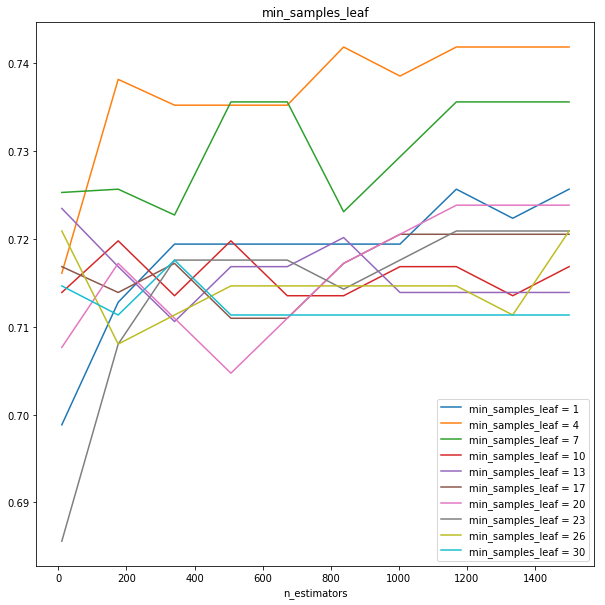

In [155]:
plt.figure(figsize=(10, 10))
plt.plot(df['n_estimators'], df.drop(columns=['n_estimators']))
plt.title('min_samples_leaf')
plt.legend(df.drop(columns=['n_estimators']).columns)
plt.xlabel('n_estimators')

**5. (1 балл)**. Посмотрите, оказались ли какие-то признаки более важными, чем остальные? Воспользуйтесь соответствующим аттрибутом случайного леса в библиотеке sklearn, чтобы построить barplot.

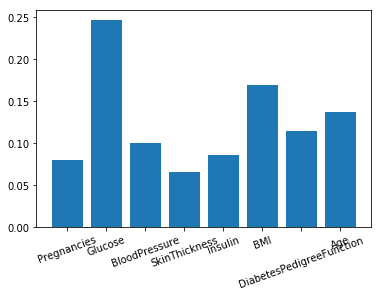

In [21]:
def plot_importance(clf, data):
    plt.bar(range(len(clf.feature_importances_)), clf.feature_importances_)
    plt.xticks(range(len(clf.feature_importances_)), data.columns, rotation=20)

plot_importance(random_forest, X_train)

**6. (2 балла)** Обучите HistGradientBoostingClassifier и GradientBoostingClassifier из sklearn. Опишите подробно, в чем заключается разница этих моделей. Подберите подходящее количество деревьев и проанализируйте метрики, с которыми мы работали выше.

In [35]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold

In [43]:
model = GradientBoostingClassifier()
model.fit(X_train, y_train)

GradientBoostingClassifier()

In [44]:
metrics(model, X_test, y_test)

accuracy: 0.7445887445887446
precision: 0.6153846153846154
recall: 0.7


In [45]:
from sklearn.experimental import enable_hist_gradient_boosting

In [46]:
from sklearn.ensemble import HistGradientBoostingClassifier

In [47]:
model = HistGradientBoostingClassifier()
model.fit(X_train, y_train)

HistGradientBoostingClassifier()

In [49]:
metrics(model, X_test, y_test)

accuracy: 0.7532467532467533
precision: 0.6292134831460674
recall: 0.7


#### В чем разница этих моделей

Разница в построении деревьев. На больших данных Hist будет работать быстрее. В документации они ссылаются на LightGBM. 
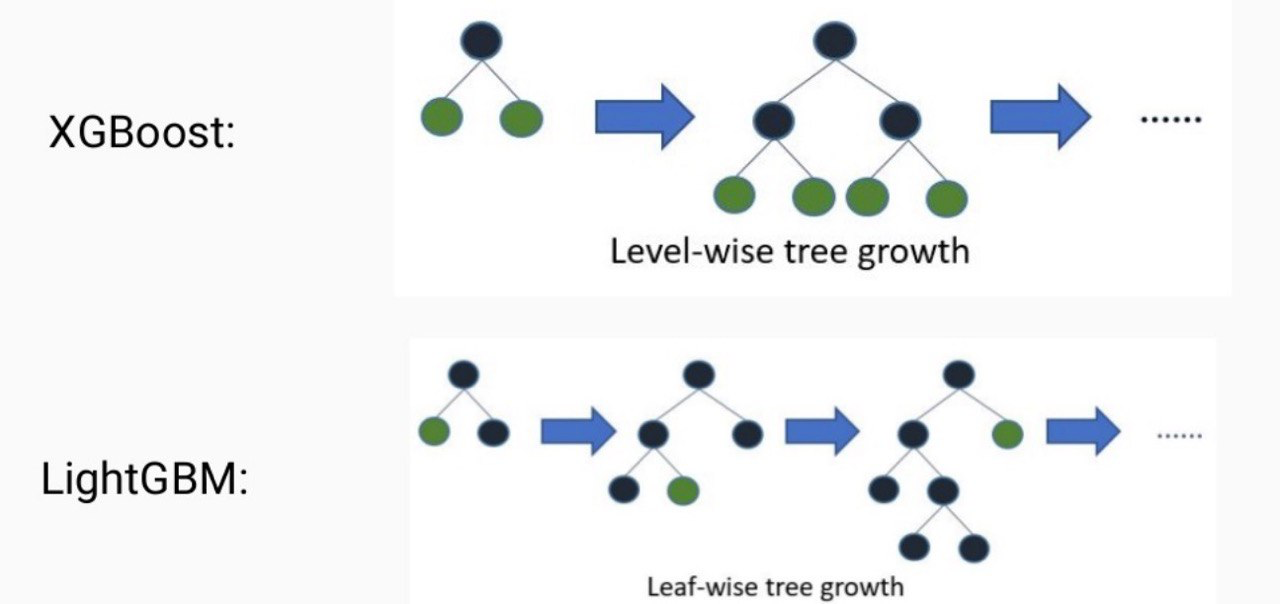
В лайтгбм построение дерева отличается, вот на картинке сверху обычное построение дерева, а снизу алгоритм lightgbm. В lightgbm выбирается вершина, в которой меньше всего уменьшился критерий информативности - из-за этого одно дерево lightgbm делает меньше разбиение

**7. (1.5 балла)** Вспомните, что представляет собой [стэкинг моделей](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.StackingClassifier.html#sklearn.ensemble.StackingClassifier). Возьмите в качестве базовых моделей любой ансамблевый метод из тех, которые были использованы выше, и простой классфикатор из уже вами изученных на курсе. Как final_estimator используйте лог-регресссию. Посчитайте метрики для мета-классификатора. Улучшилось ли качество?

In [161]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression

In [158]:
from sklearn.neighbors import KNeighborsClassifier

In [167]:
base_learners = [
                 ('Bagging', BaggingClassifier()),
                 ('KNeighbors', KNeighborsClassifier())
                ]

In [168]:
clf = StackingClassifier(estimators=base_learners, final_estimator=LogisticRegression())

In [169]:
clf.fit(X_train, y_train)

StackingClassifier(estimators=[('Bagging', BaggingClassifier()),
                               ('KNeighbors', KNeighborsClassifier())],
                   final_estimator=LogisticRegression())

In [170]:
metrics(clf, X_test, y_test)

accuracy: 0.7402597402597403
precision: 0.625
recall: 0.625
